## Impact of removing age from training data

In [7]:
import pandas as pd

results_df = pd.read_csv('/Users/Gabriel/MSc_Dissertation/pyRadiomics/Model_performance/Archive_mixed_rois/Age_Importance/Original_XGBoost_evaluation.csv')
withoutAge = pd.read_csv('/Users/Gabriel/MSc_Dissertation/pyRadiomics/Model_performance/Archive_mixed_rois/Age_Importance/Original_XGBoost_evaluation_noAge.csv')

# Compare balanced accuracy between with and without age
avg_withAge = results_df['WHO CNS Grade balanced-accuracy'].mean().round(2)
avg_withoutAge = withoutAge['WHO CNS Grade balanced-accuracy'].mean().round(2)

avg_withAgeIDH = results_df['IDH balanced-accuracy'].mean().round(2)
avg_withoutAgeIDH = withoutAge['IDH balanced-accuracy'].mean().round(2)

print(f'Average WHO balanced accuracy with Age: {avg_withAge}')
print(f'Average WHO balanced accuracy without Age: {avg_withoutAge}')

print(f'Average IDH balanced accuracy with Age: {avg_withAgeIDH}')
print(f'Average IDH balanced accuracy without Age: {avg_withoutAgeIDH}')

# Compare how the 5 best models changed performance

topAvg_withAge = results_df['WHO CNS Grade balanced-accuracy'].nlargest(5).mean().round(2)
topAvg_withoutAge = withoutAge['WHO CNS Grade balanced-accuracy'].nlargest(5).mean().round(2)

topAvg_withAgeIDH = results_df['IDH balanced-accuracy'].nlargest(5).mean().round(2)
topAvg_withoutAgeIDH = withoutAge['IDH balanced-accuracy'].nlargest(5).mean().round(2)

print(f'\nAverage of top 5 WHO CNS Grade balanced accuracy with Age: {topAvg_withAge}')
print(f'Average of top 5 WHO CNS Grade balanced accuracy without Age: {topAvg_withoutAge}')

print(f'Average of top 5 IDH balanced accuracy with Age: {topAvg_withAgeIDH}')
print(f'Average of top 5 IDH balanced accuracy without Age: {topAvg_withoutAgeIDH}')



Average WHO balanced accuracy with Age: 0.53
Average WHO balanced accuracy without Age: 0.55
Average IDH balanced accuracy with Age: 0.79
Average IDH balanced accuracy without Age: 0.77

Average of top 5 WHO CNS Grade balanced accuracy with Age: 0.74
Average of top 5 WHO CNS Grade balanced accuracy without Age: 0.74
Average of top 5 IDH balanced accuracy with Age: 0.94
Average of top 5 IDH balanced accuracy without Age: 0.96


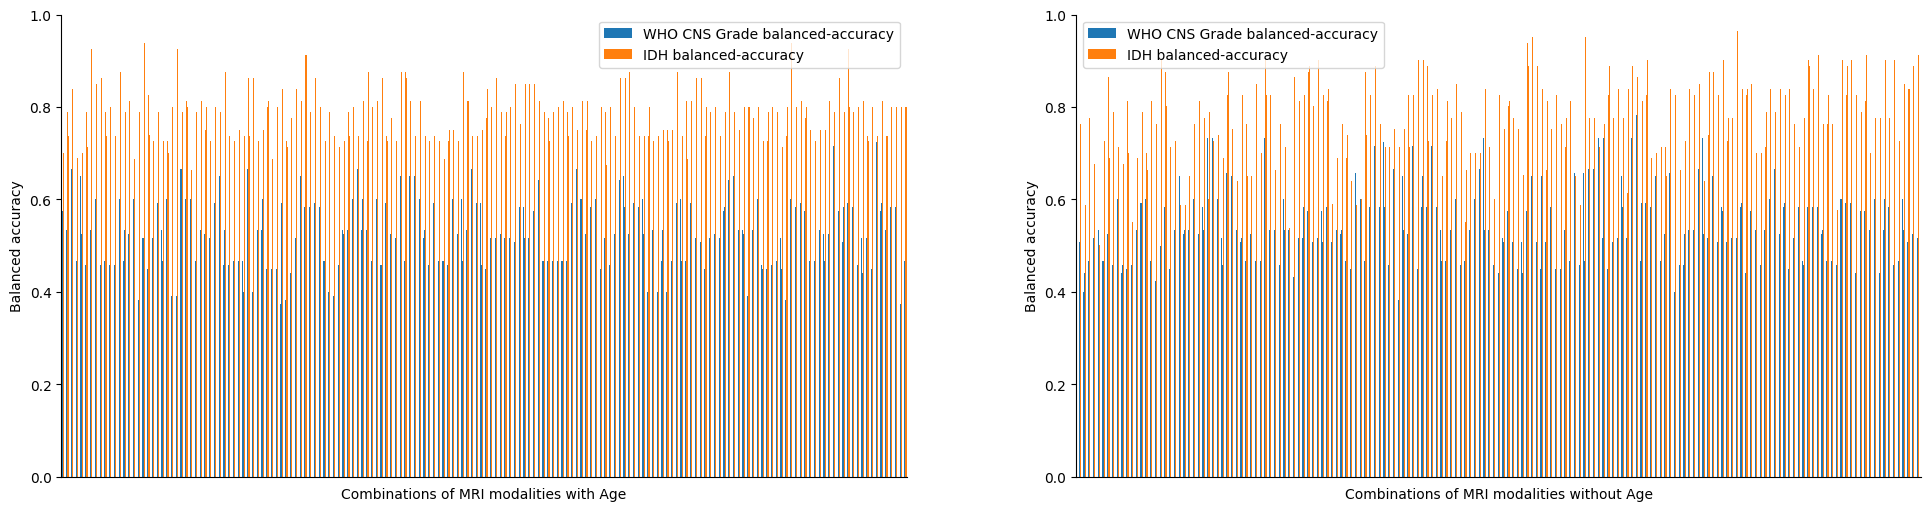

In [5]:
import matplotlib.pyplot as plt

def visualize_comparison(results_df, withoutAge, Filter):
    # Select only columns with '_balanced-accuracy' in their names
    performance_columns = [col for col in results_df.columns if 'balanced-accuracy' in col]
    results_df = results_df[['Acquisition'] + performance_columns]
    withoutAge = withoutAge[['Acquisition'] + performance_columns]

    # Create the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))  # create a figure with two subplots (axes)

    # Plot the data
    results_df.plot.bar(rot=0, ax=ax1)  # Plot on the first axis
    ax1.set_ylim(0, 1)
    ax1.set_ylabel("Balanced accuracy")
    ax1.set_xlabel("Combinations of MRI modalities with Age")
    ax1.axes.get_xaxis().set_ticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    withoutAge.plot.bar(rot=0, ax=ax2)  # Plot on the second axis
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("Balanced accuracy")
    ax2.set_xlabel("Combinations of MRI modalities without Age")
    ax2.axes.get_xaxis().set_ticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    # Save the figure
    fig.savefig(f"/Users/Gabriel/Desktop/AgeImportance.png", dpi=300)

Filter = 'original'

# Import data 
results_df = pd.read_csv('/Users/Gabriel/MSc_Dissertation/pyRadiomics/Model_performance/EvalAllModalities/Age_Importance/Original_XGBoost_evaluation.csv')
withoutAge = pd.read_csv('/Users/Gabriel/MSc_Dissertation/pyRadiomics/Model_performance/EvalAllModalities/Age_Importance/Original_XGBoost_evaluation_noAge.csv')

# Call the function
visualize_comparison(results_df, withoutAge, Filter)
